<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/IL0h70f453GkRGzF/11%E6%9C%8815%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第47章：ナップサック問題

In [ ]:
def Q47(i, w):
    if i == n:
        return 0
    elif w < W[i]:
        return Q47(i + 1, w)
    else:
        return max(
            Q47(i + 1, w),
            Q47(i + 1, w - W[i]) + V[i]
        )

In [ ]:
n =  5
W_capacity =  175
W =  [95, 56, 65, 54, 32]
V =  [79, 9, 57, 55, 27]

In [ ]:
Q47(0, W_capacity)

139

In [ ]:
n =  10
W_capacity =  492
W =  [53, 64, 82, 93, 76, 67, 10, 6, 82, 91]
V =  [80, 16, 30, 68, 31, 19, 50, 64, 20, 96]

In [ ]:
Q47(0, W_capacity)

438

In [ ]:
n =  20
W_capacity =  1371
W =  [30, 31, 100, 83, 52, 97, 34, 70, 96, 13, 70, 89, 79, 51, 31, 93, 73, 10, 77, 31]
V =  [31, 58, 49, 75, 1, 57, 8, 1, 35, 22, 82, 28, 61, 46, 68, 10, 32, 84, 19, 16]

In [ ]:
Q47(0, W_capacity)

783

In [ ]:
def Q47_better(i, w):
    if memo[i][w] >= 0:
        return memo[i][w]

    if i == n:
        ret = 0
    elif w < W[i]:
        ret = Q47_better(i + 1, w)
    else:
        ret = max(
            Q47_better(i + 1, w),
            Q47_better(i + 1, w - W[i]) + V[i]
        )
    memo[i][w] = ret
    return ret

In [ ]:
memo = [[-1 for _ in range(W_capacity + 1)] for _ in range(len(W) + 1)]

In [ ]:
%%timeit
Q47(0, W_capacity)

645 ms ± 5.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
memo = [[-1 for _ in range(W_capacity + 1)] for _ in range(len(W) + 1)]
Q47_better(0, W_capacity)

236 ns ± 6.32 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
n =  80
W_capacity =  1371
W =  [7, 32, 92, 96, 96, 77, 49, 84, 80, 22, 14, 87, 4, 61, 27, 90, 23, 98, 59, 80, 25, 45, 14, 46, 41, 72, 86, 40, 27, 97, 96, 52, 86, 85, 55, 48, 92, 69, 57, 89, 2, 63, 20, 80, 98, 85, 31, 86, 65, 87, 94, 27, 95, 43, 27, 24, 65, 9, 81, 53, 36, 43, 14, 98, 85, 9, 66, 45, 49, 10, 68, 19, 5, 61, 53, 76, 75, 75, 55, 36]
V =  [71, 6, 45, 90, 41, 89, 5, 57, 19, 78, 79, 100, 9, 45, 84, 41, 90, 18, 100, 34, 60, 6, 7, 82, 64, 40, 17, 44, 85, 94, 33, 90, 36, 50, 46, 66, 6, 57, 36, 4, 15, 50, 23, 94, 99, 26, 33, 95, 16, 45, 6, 93, 37, 89, 13, 52, 4, 92, 86, 10, 41, 12, 85, 43, 98, 92, 57, 38, 75, 61, 66, 1, 74, 61, 91, 33, 35, 96, 13, 17]

In [ ]:
%%timeit
memo = [[-1 for _ in range(W_capacity + 1)] for _ in range(len(W) + 1)]
Q47_better(0, W_capacity)

4.73 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
Q47_better(0, W_capacity)

783

# 第48章：個数制限なしナップサック問題

In [ ]:
def Q48():
    memo = [[0 for _ in range(W_capacity + 1)] for _ in range(len(W) + 1)]
    for i in range(len(W)):
        for w in range(W_capacity + 1):
            if w < W[i]:
                memo[i + 1][w] = memo[i][w]
            else:
                memo[i + 1][w] = max(
                    memo[i][w],
                    memo[i + 1][w - W[i]] + V[i]
                )
    return memo[len(W)][W_capacity]

In [ ]:
n = 3
W_capacity = 7
W = [3, 4, 2]
V = [4, 5, 3]
Q48()

10

In [ ]:
n =  10
W_capacity =  867
W =  [28, 92, 30, 1, 40, 33, 96, 30, 38, 86]
V =  [6, 77, 53, 91, 47, 33, 28, 28, 78, 36]
Q48()

78897

In [ ]:
n =  20
W_capacity = 1272
W =  [10, 87, 38, 74, 19, 93, 34, 24, 63, 12, 31, 99, 45, 4, 22, 81, 50, 75, 36, 20]
V =  [1, 96, 33, 97, 58, 31, 68, 60, 23, 60, 27, 7, 24, 70, 60, 73, 11, 88, 87, 71]
Q48()

22260

# 第49章：最長共通部分列問題

In [ ]:
def Q49(X, Y):
    memo = [[0 for _ in range(len(Y) + 1)] for _ in range(len(X) + 1)]
    for i in range(len(X)):
        for j in range(len(Y)):
            if X[i] == Y[j]:
                memo[i + 1][j + 1] = memo[i][j] + 1
            else:
                memo[i + 1][j + 1] = max(
                    memo[i][j + 1],
                    memo[i + 1][j]
                    )
    return memo[len(X)][len(Y)]

In [ ]:
s = "pencil"
t = "penguin"
Q49(s, t)

4

In [ ]:
s = "dreamingly"
t = "dreadfully"
Q49(s, t)

6

# 第50章：整列

In [ ]:
!wget https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/islands.txt

--2022-11-15 00:17:32--  https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/islands.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 671 [text/plain]
Saving to: ‘islands.txt’

islands.txt         100%[===================>]     671  --.-KB/s    in 0s      

2022-11-15 00:17:33 (39.8 MB/s) - ‘islands.txt’ saved [671/671]



In [ ]:
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])

In [ ]:
data

[['Africa', 11506],
 ['Antarctica', 5500],
 ['Asia', 16988],
 ['Australia', 2968],
 ['Axel Heiberg', 16],
 ['Baffin', 184],
 ['Banks', 23],
 ['Borneo', 280],
 ['Britain', 84],
 ['Celebes', 73],
 ['Celon', 25],
 ['Cuba', 43],
 ['Devon', 21],
 ['Ellesmere', 82],
 ['Europe', 3745],
 ['Greenland', 840],
 ['Hainan', 13],
 ['Hispaniola', 30],
 ['Hokkaido', 30],
 ['Honshu', 89],
 ['Iceland', 40],
 ['Ireland', 33],
 ['Java', 49],
 ['Kyushu', 14],
 ['Luzon', 42],
 ['Madagascar', 227],
 ['Melville', 16],
 ['Mindanao', 36],
 ['Moluccas', 29],
 ['New Britain', 15],
 ['New Guinea', 306],
 ['New Zealand (N)', 44],
 ['New Zealand (S)', 58],
 ['Newfoundland', 43],
 ['North America', 9390],
 ['Novaya Zemlya', 32],
 ['Prince of Wales', 13],
 ['Sakhalin', 29],
 ['South America', 6795],
 ['Southampton', 16],
 ['Spitsbergen', 15],
 ['Sumatra', 183],
 ['Taiwan', 14],
 ['Tasmania', 26],
 ['Tierra del Fuego', 19],
 ['Timor', 13],
 ['Vancouver', 12],
 ['Victoria', 82]]

In [ ]:
def bubble_sort(data):
    for i in range(len(data)):
        for j in range(len(data) - 1, i, -1):
            if data[j - 1][1] < data[j][1]:
                data[j - 1][0], data[j][0] = data[j][0], data[j - 1][0]
                data[j - 1][1], data[j][1] = data[j][1], data[j - 1][1]
    return data

In [ ]:
%%timeit
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])
bubble_sort(data)

400 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
data

[['Asia', 16988],
 ['Africa', 11506],
 ['North America', 9390],
 ['South America', 6795],
 ['Antarctica', 5500],
 ['Europe', 3745],
 ['Australia', 2968],
 ['Greenland', 840],
 ['New Guinea', 306],
 ['Borneo', 280],
 ['Madagascar', 227],
 ['Baffin', 184],
 ['Sumatra', 183],
 ['Honshu', 89],
 ['Britain', 84],
 ['Ellesmere', 82],
 ['Victoria', 82],
 ['Celebes', 73],
 ['New Zealand (S)', 58],
 ['Java', 49],
 ['New Zealand (N)', 44],
 ['Cuba', 43],
 ['Newfoundland', 43],
 ['Luzon', 42],
 ['Iceland', 40],
 ['Mindanao', 36],
 ['Ireland', 33],
 ['Novaya Zemlya', 32],
 ['Hispaniola', 30],
 ['Hokkaido', 30],
 ['Moluccas', 29],
 ['Sakhalin', 29],
 ['Tasmania', 26],
 ['Celon', 25],
 ['Banks', 23],
 ['Devon', 21],
 ['Tierra del Fuego', 19],
 ['Axel Heiberg', 16],
 ['Melville', 16],
 ['Southampton', 16],
 ['New Britain', 15],
 ['Spitsbergen', 15],
 ['Kyushu', 14],
 ['Taiwan', 14],
 ['Hainan', 13],
 ['Prince of Wales', 13],
 ['Timor', 13],
 ['Vancouver', 12]]

In [ ]:
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])

In [ ]:
data

[['Africa', 11506],
 ['Antarctica', 5500],
 ['Asia', 16988],
 ['Australia', 2968],
 ['Axel Heiberg', 16],
 ['Baffin', 184],
 ['Banks', 23],
 ['Borneo', 280],
 ['Britain', 84],
 ['Celebes', 73],
 ['Celon', 25],
 ['Cuba', 43],
 ['Devon', 21],
 ['Ellesmere', 82],
 ['Europe', 3745],
 ['Greenland', 840],
 ['Hainan', 13],
 ['Hispaniola', 30],
 ['Hokkaido', 30],
 ['Honshu', 89],
 ['Iceland', 40],
 ['Ireland', 33],
 ['Java', 49],
 ['Kyushu', 14],
 ['Luzon', 42],
 ['Madagascar', 227],
 ['Melville', 16],
 ['Mindanao', 36],
 ['Moluccas', 29],
 ['New Britain', 15],
 ['New Guinea', 306],
 ['New Zealand (N)', 44],
 ['New Zealand (S)', 58],
 ['Newfoundland', 43],
 ['North America', 9390],
 ['Novaya Zemlya', 32],
 ['Prince of Wales', 13],
 ['Sakhalin', 29],
 ['South America', 6795],
 ['Southampton', 16],
 ['Spitsbergen', 15],
 ['Sumatra', 183],
 ['Taiwan', 14],
 ['Tasmania', 26],
 ['Tierra del Fuego', 19],
 ['Timor', 13],
 ['Vancouver', 12],
 ['Victoria', 82]]

In [ ]:
def selection_sort(data):
    for i in range(0, len(data) - 1):
        max_ = i
        for j in range(i + 1, len(data)):
            if data[max_][1] < data[j][1]:
                max_ = j
        data[max_], data[i] = data[i], data[max_]
    return data

In [ ]:
%%timeit
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])
selection_sort(data)

298 µs ± 81.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
def insertion_sort(data):
    for i in range(len(data) - 1):
        j = i + 1
        while i >= 0:
            if data[j][1] > data[i][1]:
                data[i], data[j] = data[j], data[i]
                i -= 1
                j -= 1
            else:
                break
    return data

In [ ]:
%%timeit
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])
insertion_sort(data)

198 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
def quick_sort(data):
    bigger = []
    smaller = []
    pivots = []
    if len(data) <= 1:
        return data
    
    pivot = data[0][1]
    for i in range(len(data)):
        if data[i][1] > pivot:
            bigger.append(data[i])
        elif data[i][1] < pivot:
            smaller.append(data[i])
        else:
            pivots.append(data[i])
    
    bigger = quick_sort(bigger)
    smaller = quick_sort(smaller)

    return bigger + pivots + smaller

In [ ]:
%%timeit
data = []
for line in open("islands.txt"):
    c = line.split("\t")
    data.append([c[0], int(c[1])])
quick_sort(data)

166 µs ± 6.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 第51章：二次元ユークリッド座標の回転行列

In [ ]:
import math
def rotation(P, t):
    t = t * math.pi / 180
    a = [[math.cos(t), -math.sin(t)],
         [math.sin(t), math.cos(t)]]
    ax = [
        P[0] * a[0][0] + P[1] * a[0][1],
        P[0] * a[1][0] + P[1] * a[1][1]
    ]
    return ax

In [ ]:
P = [1, 0]
t = 45
rotation(P, t)

[0.7071067811865476, 0.7071067811865475]

In [ ]:
P = [0, 1]
t = 30
rotation(P, t)

[-0.49999999999999994, 0.8660254037844387]

# 第52章：正多角形

In [ ]:
def polygon(P0, n):
    angle = 360 / n
    P = [P0]
    for i in range(n):
        x = rotation(P[i], angle)
        P.append(x)
    return P

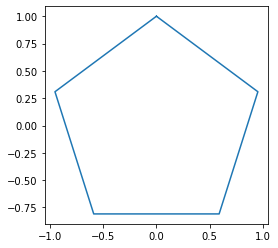

In [ ]:
import matplotlib.pyplot as plt
P = [0, 1]
n = 5
points = polygon(P, n)
plt.figure(figsize=(4,4))
plt.plot([p[0] for p in points], [p[1] for p in points])
plt.show()

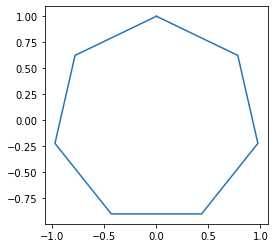

In [ ]:
import matplotlib.pyplot as plt
P = [0, 1]
n = 7
points = polygon(P, n)
plt.figure(figsize=(4,4))
plt.plot([p[0] for p in points], [p[1] for p in points])
plt.show()

# 第53章：芒星図形

In [ ]:
def star(P0, n):
    angle = 360 / n
    P = [P0]
    for i in range(n):
        x = rotation(P[i], angle * 2)
        P.append(x)
    return P

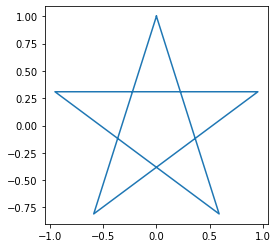

In [ ]:
import matplotlib.pyplot as plt
P = [0, 1]
n = 5
points = star(P, n)
plt.figure(figsize=(4,4))
plt.plot([p[0] for p in points], [p[1] for p in points])
plt.show()

In [ ]:
def star2(P0, n, m):
    angle = 360 / n
    P = [P0]
    for i in range(n):
        x = rotation(P[i], angle * m)
        P.append(x)
    return P

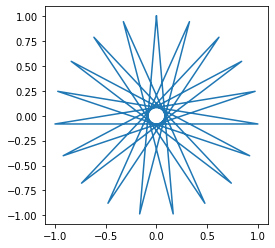

In [ ]:
import matplotlib.pyplot as plt
P = [0, 1]
n = 19
m = 10
points = star2(P, n, m)
plt.figure(figsize=(4,4))
plt.plot([p[0] for p in points], [p[1] for p in points])
plt.show()

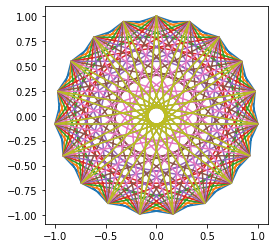

In [ ]:
import matplotlib.pyplot as plt
P = [0, 1]
n = 19

plt.figure(figsize=(4,4))
for m in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    points = star2(P, n, m)
    plt.plot([p[0] for p in points], [p[1] for p in points])
plt.show()

# 第54章：二分探索

In [ ]:
def Q54(a, k):
    lower = -1
    upper = len(a)
    while (upper - lower) > 1:
        mid = int((lower + upper) / 2)
        if a[mid] >= k:
            upper = mid
        else:
            lower = mid
    return upper

In [ ]:
n =  8
a =  [3, 4, 4, 4, 7, 9, 10, 10]
k =  8
Q54(a, k)

5

In [ ]:
n =  8
a =  [3, 4, 4, 4, 7, 9, 10, 10]
k =  4
Q54(a, k)

1

In [ ]:
n =  8
a =  [3, 4, 4, 4, 7, 9, 10, 10]
k =  0
Q54(a, k)

0